In [84]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [87]:
#3 
def log_func(x):
    return 1/(1 + np.exp(-x))

log_func(0.2 - 0.131 * 64 + 2 * 4)

0.454129343445806

In [88]:
#13
3 + 12 * 1 - 0.03 * 100

12.0

In [ ]:
stats.norm.cdf(, loc=30, scale=1)

In [13]:
data=pd.read_csv('c.csv')
data

,age,material,country,M1,M2,M3
0,29,Rubber,Mexico,13,NaN,-3.07
1,22,Aluminum,Venezuela,11,0.054840,1.46
2,21,Stone,Bolivia,5,0.022358,1.47
3,14,Wood,Serbia,6,0.402240,2.94
4,28,Plastic,Sweden,5,NaN,2.96
...,...,...,...,...,...,...
995,23,Plexiglass,Poland,12,0.050998,-0.04
996,19,Vinyl,Greece,11,0.125669,1.19
997,10,Plastic,France,14,NaN,-0.45
998,19,Stone,Argentina,7,0.024231,1.20


In [14]:
#20
data['age'].mean()

19.824

In [15]:
#21
data['age'].min()

10

In [16]:
#22
data['age'].median()

20.0

In [22]:
#23
data['material'].value_counts()

Plastic       108
Wood          104
Plexiglass     96
Steel          93
Vinyl          93
Stone          90
Brass          85
Granite        84
Rubber         83
Aluminum       82
Glass          82
Name: material, dtype: int64

<Figure size 864x648 with 0 Axes>

In [26]:
#24
data['Country_Coded'] = data['country'].apply(lambda x: 1 if x == 'China' else 0)

,age,material,country,M1,M2,M3,Country_Coded
0,29,Rubber,Mexico,13,NaN,-3.07,0
1,22,Aluminum,Venezuela,11,0.054840,1.46,0
2,21,Stone,Bolivia,5,0.022358,1.47,0
3,14,Wood,Serbia,6,0.402240,2.94,0
4,28,Plastic,Sweden,5,NaN,2.96,0
...,...,...,...,...,...,...,...
995,23,Plexiglass,Poland,12,0.050998,-0.04,0
996,19,Vinyl,Greece,11,0.125669,1.19,0
997,10,Plastic,France,14,NaN,-0.45,0
998,19,Stone,Argentina,7,0.024231,1.20,0


In [30]:
data['Country_Coded'].mean()

0.165

In [33]:
#25
data[data.material == 'Stone']['M3'].mean()

0.10233333333333329

In [36]:
#26
data['M2'].isna().sum()

328

In [45]:
#27
na_replace = data['M2'].mean()
print(na_replace)
data['M2_fixed'] = data['M2']
data['M2_fixed'].fillna(na_replace, inplace=True)

0.20696502354583335


In [49]:
M2f_mean = data['M2_fixed'].mean()
M2f_mean

0.20696502354583182

In [51]:

data[data['M2_fixed'] > M2f_mean].shape[0]

586

<AxesSubplot:xlabel='M1', ylabel='M3'>

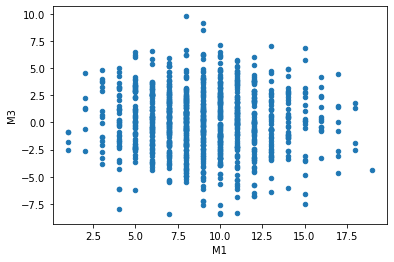

In [53]:
#28
data.plot(x='M1', y='M3', kind='scatter')

<AxesSubplot:>

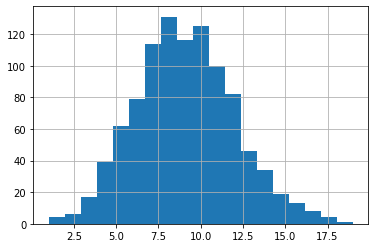

In [61]:
#29 
data['M1'].hist(bins=19)

In [67]:
# 30
corr = data[['age', 'M1', 'M2_fixed', 'M3', 'Country_Coded']].corr()
corr.style.background_gradient(cmap='coolwarm')

,age,M1,M2_fixed,M3,Country_Coded
age,1.000000,0.013564,0.016127,-0.018774,0.055902
M1,0.013564,1.000000,-0.002771,-0.034451,-0.035886
M2_fixed,0.016127,-0.002771,1.000000,0.029908,0.045775
M3,-0.018774,-0.034451,0.029908,1.000000,0.045882
Country_Coded,0.055902,-0.035886,0.045775,0.045882,1.000000


In [68]:
#31
from sklearn.linear_model import LinearRegression
data['logM3'] = np.log(100 + data['M3'])

In [69]:
X = data[['M1', 'logM3']]
y = data['age']

In [70]:
model = LinearRegression()

In [73]:
model.fit(X,y)

LinearRegression()

In [74]:
model.coef_

array([ 0.02565779, -3.78467532])

In [76]:
model.intercept_

37.024981343123116

In [81]:
#32 
from sklearn.metrics import mean_squared_error as MSE

In [82]:
MSE(y, model.predict(X))

37.466299724201846